# Midterm 1:  Python Problems


There are three python problems.  Answer all the sections marked `#TODO`.  Print to PDF.  Submit the PDF only. 

## Loading Packages and Data

For the problems, you can use the following packages

In [584]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

Run the following code to download the data for the midterm.  This will retrieve three files -- one for each problem.

In [585]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
file_path = 'https://drive.google.com/file/d/10_1PxDIoSiuuOFC_iyVaoU9bDiQYHcTT/view?usp=sharing'
file_id = '10_1PxDIoSiuuOFC_iyVaoU9bDiQYHcTT'

dst = 'midterm_data.zip'
download_file_from_google_drive(file_id, dst)


# Unzip the files
import zipfile
with zipfile.ZipFile(dst, 'r') as zip_ref:
    zip_ref.extractall('data')
    
    
# Move them to the top directory
import shutil
for fn in ['prob_linear.p', 'prob_model.p', 'prob_logistic.p']:
    src = 'data/midterm1_data/%s' % fn
    shutil.move(src, fn)
    print('%s loaded' % fn)

prob_linear.p loaded
prob_model.p loaded
prob_logistic.p loaded


## Problem 1.  Linear Regression

Run the following code to load the data

In [586]:
with open('prob_linear.p', 'rb') as fp:
    X,y = pickle.load(fp)

Split the data into training and test.  You may use the `train_test_split` function.

In [587]:
# TODO
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

In [588]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


Suppose we want to fit a model of the form:

    yhat[i] = b + w[0]*X[i,0] + w[1]*X[i,1] + w[2]*X[i,0]*X[i,1] + w[3]*X[i,0]**2 + w[4]*X[i,1]**2
    
Complete the function `transform` below that creates a matrix `Z` whose columns are the basis functions for this model.  You may use the `np.column_stack()` function.  For example,

    Z = np.column_stack((col1, col2, col3))
    
creates a matrix `Z` with columns `col1`, `col2`, and `col3`.

In [589]:
def transform(X):
    # TODO
    Z = np.column_stack((X[:,0], X[:,1], X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2))
    return Z


In [590]:
# Testing on transform function
Z = transform(X)
print(Z.shape)
print(X[0, :])
print(Z[0, :])

(500, 5)
[-0.54002778 -0.81326207]
[-0.54002778 -0.81326207  0.43918411  0.29163     0.66139519]


Now fit and evaluate the model:

* Fit the model on the training data.  You may use the `LinearRegression` object and the `transform` function above.
* Predict the values `y` on the test data
* Print the test MSE 


In [591]:
# TODO
# Transform Xtr and Xts
Ztr, Zts = transform(Xtr), transform(Xts)
# Fit Xtr with ytr
reg = LinearRegression()
reg.fit(Ztr, ytr)
# predict yhat from Zts
yhat = reg.predict(Zts)
# Compute test MSE with yhat and yts
MSE = np.mean((yhat - yts)**2)
print("The test Mean Squared Error is: ", MSE)

The Mean Squared Error is:  0.021783514997517208


## Problem 2.  Model Selection

Run the code below to load and plot the data.
The data is from two experiments:

*  `Xtr[:,0], Ytr[:,0]` is the training data from experiment 0
*  `Xtr[:,1], Ytr[:,1]` is the training data from experiment 1
*  `Xts[:,0], Yts[:,0]` is the test data from experiment 0
*  `Xts[:,1], Yts[:,1]` is the test data from experiment 1



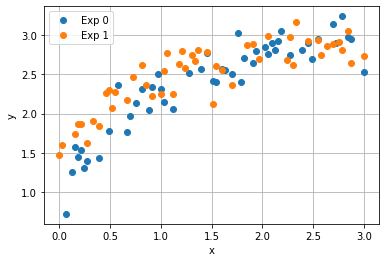

In [592]:
with open('prob_model.p', 'rb') as fp:
    Xtr, Xts, Ytr, Yts = pickle.load(fp)
    
plt.plot(Xtr[:,0], Ytr[:,0], 'o')
plt.plot(Xtr[:,1], Ytr[:,1], 'o')
plt.legend(['Exp 0', 'Exp 1'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [593]:
# Checking the shapes of objects
print(Xtr.shape, Xts.shape)
print(Ytr.shape, Yts.shape)

(50, 2) (50, 2)
(50, 2) (50, 2)


You want to learn the relation between `y` vs. `x`. 

First, fit two *separate* models for each experiment of the form:
    
     Y[:,0] ~= a0 + b0*exp(-X[:,0])
     Y[:,1] ~= a1 + b1*exp(-X[:,1])
    
 
For the data in each experiment, fit the model and pint the test MSE.

You may use the `LinearRegression` function for the fitting. But, if `z` is a vector (not a matrix), you cannot use:

     reg = LinearRegression()
     reg.fit(z, y)   # WILL NOT WORK if z is a vector.
     
You must reshape `z` to a `n x 1` matrix first:

     reg = LinearRegression()
     reg.fit(z[:,None], y)   # This will work


In [594]:
# TODO
nexp = Xtr.shape[1]  # number of experiments = 2
reg = LinearRegression()
for i in range(nexp):
    Ztr = np.exp(-Xtr[:,i])
    Zts = np.exp(-Xts[:,i])
    Ztr = Ztr[:,None]
    Zts = Zts[:,None]
    reg.fit(Ztr, Ytr[:,i])
    yhat = reg.predict(Zts)
    mse = np.mean((yhat-Yts[:,i])**2)
    print("The test Mean Square Error for experiment {} is {}".format(i, mse))

The test Mean Square Error for experiment 0 is 0.0339311556185114
The test Mean Square Error for experiment 1 is 0.041306971069426573


Now, fit a model of the form:

     Y[:,0] = a + b0*exp(-X[:,0])
     Y[:,1] = a + b1*exp(-X[:,1])
     
So, the two experiments have the same  intercept term.  Fit the model on the training data and measure the test MSE.

For training, you will want to combine the data into a single feature matrix `Z` using `Xtr[:,0]` and `Xtr[:,1]` and single target vector `b` from `Ytr[:,0]` and `Ytr[:,1]`.  


In [595]:
# combine data into a single feature matrix Z so that Z.shape = (100, 2)
# Z[:,0] will be X[:,0] concatenated with 50 zeros
# Z[:,1] will be 50 zeros concatenated with X[:,0]
# new y = Ytr[:,0] concatenate with Ytr[:,1] where y.shape = (100,)
# Therefore, this is effectively One Hot Coding 
# where X[:,1] doesn't affect prediction for y[:,0] because it's all zeros from X[:50, 1]
# and X[:,0] doesn't affect prediction for y[:,1] because it's all zeros from X[:50, 0]
def transform(X1, X2):
    # we apply np.exp to only X1 and X2 and not to the zeros
    # because e^0 = 1 and we want zeros not ones
    X1 = np.concatenate((np.exp(-X1), np.zeros(X1.shape[0])))
    X2 = np.concatenate((np.zeros(X2.shape[0]), np.exp(-X2)))
    Z = np.column_stack((X1, X2))
    return Z

Ztr = transform(Xtr[:,0], Xtr[:,1])
Zts = transform(Xts[:,0], Xts[:,1])

ytr = np.concatenate((Ytr[:,0], Ytr[:,1]))
yts = np.concatenate((Yts[:,0], Yts[:,1]))

reg.fit(Ztr, ytr)
print("The intercept of this model a is ", reg.intercept_)
print("The coefficients b0: {} and b1: {}".format(reg.coef_[0], reg.coef_[1]))
yhat = reg.predict(Zts)
MSE = np.mean((yhat-yts)**2)
print("The test Mean Square Error for two experiements having same intercept is ", MSE)



The intercept of this model a is  3.014375171542548
The coefficients b0: -2.002742788796573 and b1: -1.4855462808906121
The test Mean Square Error for two experiements having same intercept is  0.03728014246956259


## Problem 3.  Logistic Regression

Run the following code to load the data as follows:

In [596]:
with open('prob_logistic.p', 'rb') as fp:
    X,y = pickle.load(fp)

In [597]:
# Checking shape and content of X y
print(X.shape)
print(y.shape)
print(X[0:5, :])
print(y[:5])

(400, 2)
(400,)
[[ 0.08294982 -0.19753769]
 [-0.06222682  0.01981546]
 [ 0.36398206  0.73624195]
 [ 0.13820735  0.40317062]
 [ 0.98679706  0.02633604]]
[0. 0. 1. 0. 1.]


Plot a scatter plot of the data with different colors for the two classes.  You may use the `plt.scatter` function.

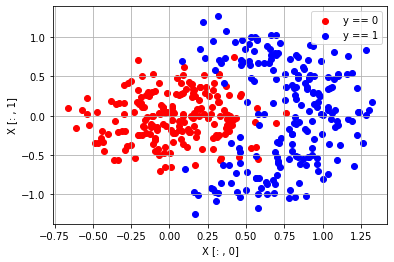

In [598]:
# TODO
plt.scatter(X[(y==0),0], X[(y==0), 1], c='r')
plt.scatter(X[(y==1),0], X[(y==1), 1], c='b')
plt.legend(['y == 0','y == 1'],loc='upper right')
plt.grid(True)
plt.xlabel("X [: , 0]")
plt.ylabel("X [: , 1]")
plt.show()


Split the data into training and test.  You may use the `train_test_split` method.  Use `test_size=0.5`.

In [599]:
# TODO
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.5)

Consider a classifier of the form:

    yhat[i] = 1 when z[i] > t
    yhat[i] = 0 when z[i] <= t
         
where `z[i] = X[i,0] + np.abs(X[i,1])`.
         
For each value `t` in `ttest`, compute the accuracy of the classifier on the *training* data. 
Plot the training accuracy as a function of `t`.

Text(0, 0.5, 'Accuracy')

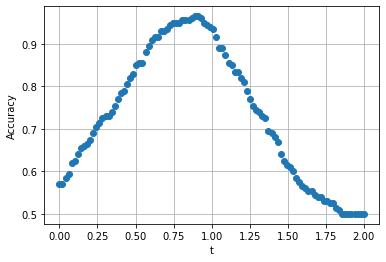

In [600]:
ttest = np.linspace(0,2,100)
# vector of accuracy with size = len(ttest)
accuracy = np.zeros((100))
# make z vector 
z = Xtr[:,0] + np.abs(Xtr[:,1])

for i, t in enumerate(ttest):
    yhat = z > t
    accuracy[i] = np.mean(yhat == ytr)

plt.plot(ttest, accuracy, 'o')
plt.grid()
plt.xlabel("t")
plt.ylabel("Accuracy")

Find the value of `t` with the highest training accuracy.  Print the test accuracy for the classifier with that value of `t`.

In [601]:
# TODO: 
iopt = np.argmax(accuracy)
topt = ttest[iopt]

# TODO.
z = Xts[:,0] + np.abs(Xts[:,1])
yhat = z > topt
acc_ts = np.mean(yhat == yts)
print("The test accuracy with t {} is {}".format(topt, acc_ts))

The test accuracy with t 0.888888888888889 is 0.94
